### Deep Learning Assignment 3 Data Exploration


In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from data_loader import DataLoader

In [2]:
data_loader = DataLoader()
data_train = data_loader.get_processed_data('datasets\\no1_train.csv')
data_valid = data_loader.get_processed_data('datasets\\no1_validation.csv')

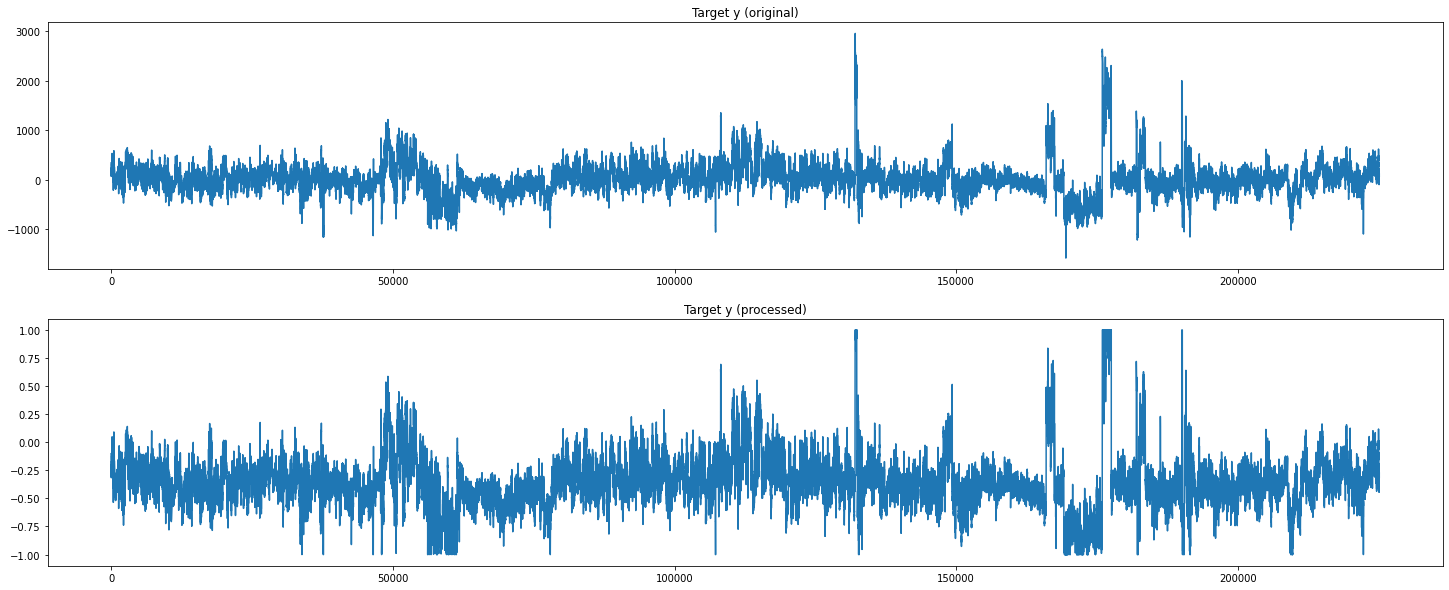

In [3]:
figs, axs = plt.subplots(2, figsize=(25, 10))
axs[0].set_title('Target y (original)')
axs[0].plot(data_train['y_original'])
axs[1].set_title('Target y (processed)')
axs[1].plot(data_train['y'])
plt.show()

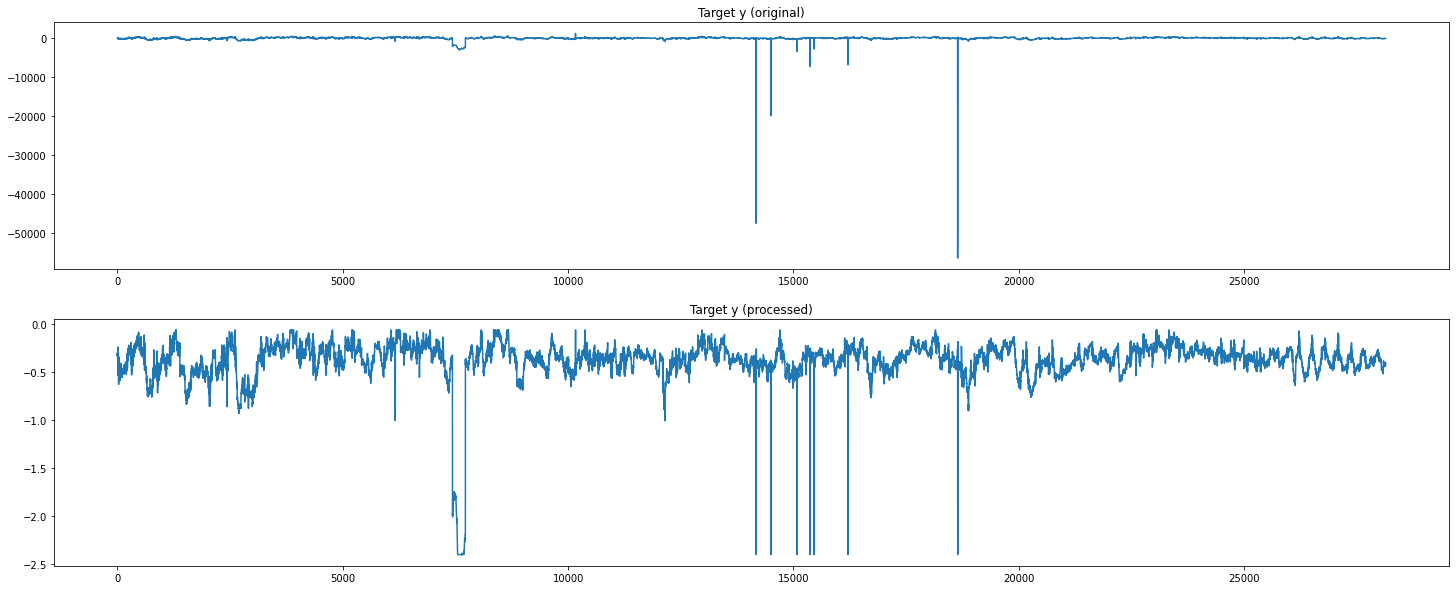

In [4]:
figs, axs = plt.subplots(2, figsize=(25, 10))
axs[0].set_title('Target y (original)')
axs[0].plot(data_valid['y_original'])
axs[1].set_title('Target y (processed)')
axs[1].plot(data_valid['y'])
plt.show()

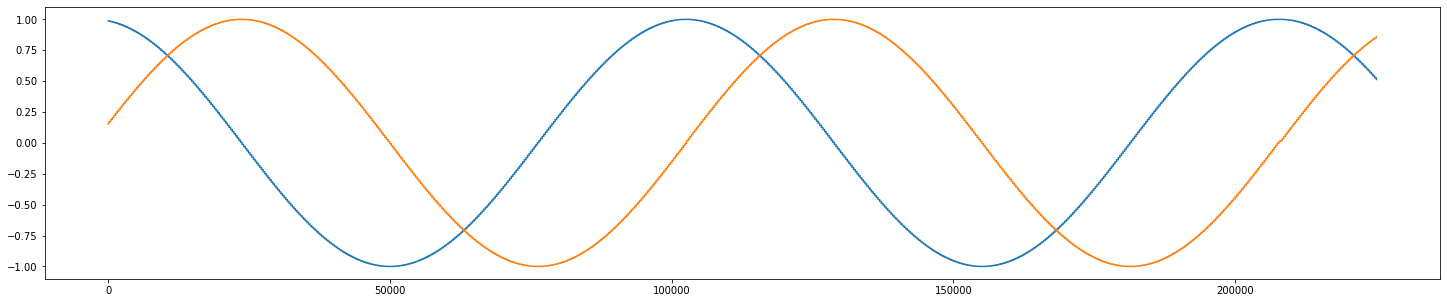

In [5]:
plt.figure(figsize=(25, 5))
plt.plot(data_train['cos_yearday'])
plt.plot(data_train['sin_yearday'])
plt.show()

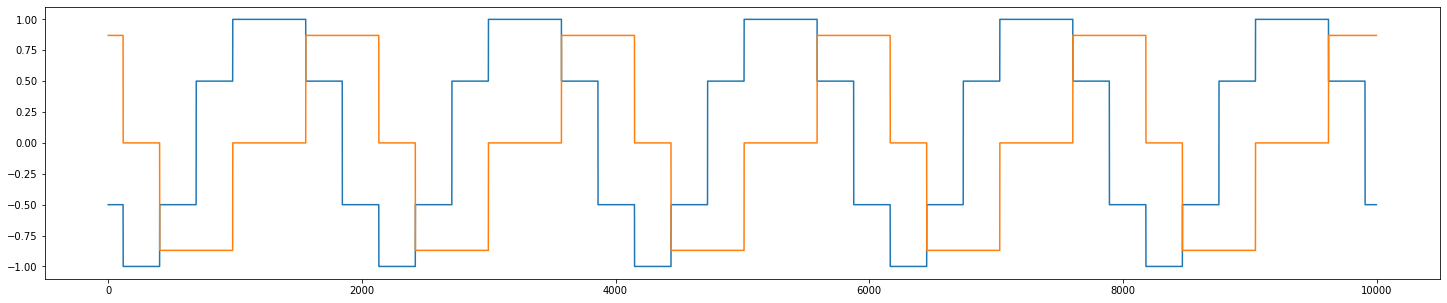

In [7]:
plot_range = 10000
plt.figure(figsize=(25, 5))
plt.plot(data_train.iloc[:plot_range]['cos_weekday'])
plt.plot(data_train.iloc[:plot_range]['sin_weekday'])
plt.show()

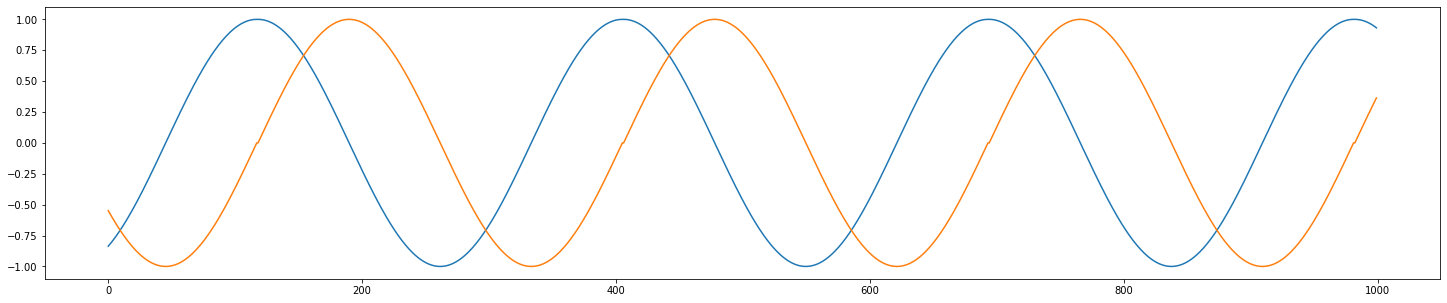

In [8]:
plot_range = 1000
plt.figure(figsize=(25, 5))
plt.plot(data_train.iloc[:plot_range]['cos_minute'])
plt.plot(data_train.iloc[:plot_range]['sin_minute'])
plt.show()

In [9]:
data_train.drop(['hydro', 'micro', 'thermal', 'wind', 'river', 'total', 'sys_reg', 'flow'], axis=1).iloc[286:300]


,start_time,y,y_original,y_yesterday,y_prev,hour_of_day,min_of_day,cos_minute,sin_minute,day_of_week,cos_weekday,sin_weekday,day_of_year,cos_yearday,sin_yearday,date,daily_mean
286,2019-01-10 14:00:00,-0.077816,372.028029,NaN,-0.084769,14,840,-0.859570,-0.511019,3,-1.0,0.0,10,0.98524,0.171177,2019-01-10,-0.235974
287,2019-01-10 14:05:00,-0.074404,376.374054,NaN,-0.077816,14,845,-0.848177,-0.529713,3,-1.0,0.0,10,0.98524,0.171177,2019-01-10,-0.235974
288,2019-01-10 14:10:00,-0.075570,374.887951,-0.101918,-0.074404,14,850,-0.836378,-0.548153,3,-1.0,0.0,10,0.98524,0.171177,2019-01-10,-0.235974
289,2019-01-10 14:15:00,-0.080538,368.561429,-0.110724,-0.075570,14,855,-0.824178,-0.566331,3,-1.0,0.0,10,0.98524,0.171177,2019-01-10,-0.235974
290,2019-01-10 14:20:00,-0.083400,364.915513,-0.115621,-0.080538,14,860,-0.811583,-0.584237,3,-1.0,0.0,10,0.98524,0.171177,2019-01-10,-0.235974
291,2019-01-10 14:25:00,-0.104558,337.967473,-0.137165,-0.083400,14,865,-0.798599,-0.601864,3,-1.0,0.0,10,0.98524,0.171177,2019-01-10,-0.235974
292,2019-01-10 14:30:00,-0.113847,326.137265,-0.158632,-0.104558,14,870,-0.785232,-0.619201,3,-1.0,0.0,10,0.98524,0.171177,2019-01-10,-0.235974
293,2019-01-10 14:35:00,-0.140671,291.972908,-0.187670,-0.113847,14,875,-0.771489,-0.636242,3,-1.0,0.0,10,0.98524,0.171177,2019-01-10,-0.235974
294,2019-01-10 14:40:00,-0.159131,268.461842,-0.197395,-0.140671,14,880,-0.757376,-0.652979,3,-1.0,0.0,10,0.98524,0.171177,2019-01-10,-0.235974
295,2019-01-10 14:45:00,-0.186346,233.799615,-0.230583,-0.159131,14,885,-0.742901,-0.669402,3,-1.0,0.0,10,0.98524,0.171177,2019-01-10,-0.235974
